# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [2]:
data = pd.read_csv('/Users/elissadejong/P2_creditcard_offer/creditcardmarketing.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# Taking a peek at the data

In [3]:
data.shape

(18000, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [5]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [6]:
# checking for duplicates
data.duplicated().any()

False

# Getting the data into SQL 

## Standardizing the headers of the columns

In [7]:
# replacing ' ' with '_'
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))

data.columns = cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [8]:
# replacing '#_' with ''
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace('#_',''))

data.columns = cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## Generating a copy of the data into a CSV file to load it into SQL

In [9]:
data_sql = data.copy()

In [10]:
data_sql.to_csv(r'/Users/elissadejong/P2_creditcard_offer/creditcardmarketing_sql.csv')

# Data prep

## Checking and dealing with null values & non-alphanumerical characters 

In [11]:
data.isna().sum()/len(data)*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [12]:
# the amount of null values in average_balance and the q1, q2, q3 and q4 balances is quite low
# hence, the rows with null values are not deleted from the data, but filled with the mean
mean = data['average_balance'].mean()
data['average_balance'] = data['average_balance'].fillna(mean)

In [13]:
mean_q1 = data['q1_balance'].mean()
data['q1_balance'] = data['q1_balance'].fillna(mean_q1)

In [14]:
mean_q2 = data['q2_balance'].mean()
data['q2_balance'] = data['q2_balance'].fillna(mean_q2)

In [15]:
mean_q3 = data['q3_balance'].mean()
data['q3_balance'] = data['q3_balance'].fillna(mean_q3)

In [16]:
mean_q4 = data['q4_balance'].mean()
data['q4_balance'] = data['q4_balance'].fillna(mean_q4)

In [17]:
# checking if the filling of null values worked
data.isna().sum()/len(data)*100

customer_number         0.0
offer_accepted          0.0
reward                  0.0
mailer_type             0.0
income_level            0.0
bank_accounts_open      0.0
overdraft_protection    0.0
credit_rating           0.0
credit_cards_held       0.0
homes_owned             0.0
household_size          0.0
own_your_home           0.0
average_balance         0.0
q1_balance              0.0
q2_balance              0.0
q3_balance              0.0
q4_balance              0.0
dtype: float64

In [18]:
# a function to check for non-alphanumerical characters in columns using regex
def not_alphanum(column):
    pattern = '\W'
    column = column.astype(str)
    for i in column:
        if pattern in i:
            return pattern
        elif pattern not in i:
            return 'no non-alphanumerical characters found'

In [19]:
# the unique values of the following columns:
# - offer_accepted 
# - reward
# - mailer_type, 
# - credit_cards_held  
# - household_size
# were already checked in SQL and did not contain non-alphanumerical characters
# therefore those will not be checked again here in Python

In [20]:
not_alphanum(data['customer_number'])

'no non-alphanumerical characters found'

In [21]:
not_alphanum(data['income_level'])

'no non-alphanumerical characters found'

In [22]:
not_alphanum(data['bank_accounts_open'])

'no non-alphanumerical characters found'

In [23]:
not_alphanum(data['overdraft_protection'])  

'no non-alphanumerical characters found'

In [24]:
not_alphanum(data['credit_rating'])

'no non-alphanumerical characters found'

In [25]:
not_alphanum(data['homes_owned'])

'no non-alphanumerical characters found'

In [26]:
not_alphanum(data['own_your_home'])

'no non-alphanumerical characters found'

In [27]:
not_alphanum(data[['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']])

'no non-alphanumerical characters found'

## Prepping the numerical variables

In [28]:
# making a dataframe with only the numerical variables
numerical = pd.DataFrame(data.select_dtypes(np.number))
numerical.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [29]:
# checking the correlations using corr() & heatmapping
numerical.corr()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,1.000000,-0.004617,-0.008215,-0.002828,0.006111,0.009352,0.012209,0.011563,0.006397,-0.005898
bank_accounts_open,-0.004617,1.000000,-0.001728,0.004772,0.008479,-0.003906,-0.002812,-0.007949,0.000190,-0.000355
credit_cards_held,-0.008215,-0.001728,1.000000,-0.002547,-0.003074,-0.003467,-0.009440,-0.007369,-0.007619,0.015354
homes_owned,-0.002828,0.004772,-0.002547,1.000000,0.005304,0.017959,0.013138,0.009754,0.007771,0.014769
household_size,0.006111,0.008479,-0.003074,0.005304,1.000000,-0.003581,-0.005078,-0.008762,0.003631,0.000232
average_balance,0.009352,-0.003906,-0.003467,0.017959,-0.003581,1.000000,0.481507,0.800285,0.752741,0.572380
q1_balance,0.012209,-0.002812,-0.009440,0.013138,-0.005078,0.481507,1.000000,0.483134,-0.060961,-0.237283
q2_balance,0.011563,-0.007949,-0.007369,0.009754,-0.008762,0.800285,0.483134,1.000000,0.487710,0.168955
q3_balance,0.006397,0.000190,-0.007619,0.007771,0.003631,0.752741,-0.060961,0.487710,1.000000,0.565298
q4_balance,-0.005898,-0.000355,0.015354,0.014769,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


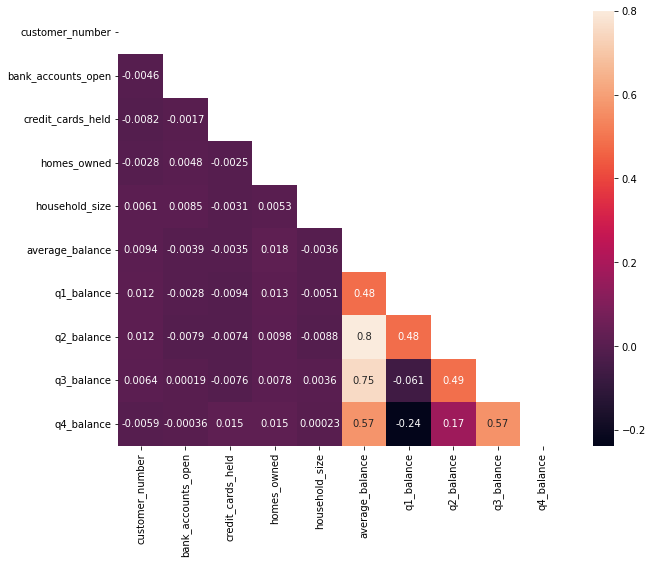

In [30]:
mask = np.zeros_like(numerical.corr())

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

In [32]:
# checking for multicollinearity using VIF

vif_numerical = add_constant(numerical)
vif_numerical

,const,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1.0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1.0,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,1.0,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,1.0,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1.0,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...
17995,1.0,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1.0,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1.0,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1.0,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [33]:
vif = pd.DataFrame(index=vif_numerical.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numerical), i),2)
                     for i in range(len(vif_numerical.columns))]

In [34]:
vif.sort_values("VIF Factor")

,VIF Factor
customer_number,1.00
bank_accounts_open,1.00
credit_cards_held,1.00
homes_owned,1.00
household_size,1.00
const,41.52
average_balance,inf
q1_balance,inf
q2_balance,inf
q3_balance,inf
